## Third Lab

What we are going to do today:
- Introduce two optimizers for local search methods
- Use the optimizer with the methods defined before

This cell below is simply importing some useful stuff for later

In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from time import time as t

## Optimizers
### 2opt
As we saw last time, we have 12 problems and two have an optimal solution

In [2]:
import numpy as np

from src.utils import compute_length


def step2opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 1
    tsp_sequence = np.array(solution)
    uncrosses = 0
    # TODO
    for i in range(1, seq_length - 1):
        for j in range(i + 1, seq_length):
            
    # END TODO
    return tsp_sequence, distance, uncrosses

def alessio_swap2opt(tsp_sequence, i, j):
    # TODO
    new_tsp_sequence = tsp_sequence[0: i - 1]
    tmp = tsp_sequence[i : j]
    tmp.reverse()
    new_tsp_sequence.append(tmp)
    new_tsp_sequence.append(tsp_sequence[j + 1 :])
    # END TODO
    return new_tsp_sequence

def swap2opt(tsp_sequence, i, j):
    # TODO
    new_tsp_sequence = np.copy(tsp_sequence)
    new_tsp_sequence[i:j + 1] = np.flip(tsp_sequence[i:j + 1], axis=0)  
    # END TODO
    return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    # TODO
    while uncross < max_num_of_uncrosses:
      
    # END TODO

#### Let's test it



#############################
name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


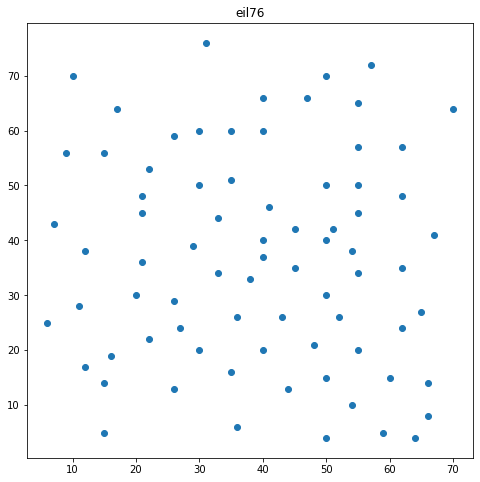

In [3]:
from src.io_tsp import ProblemInstance
example_problem = "../problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
p_inst.print_info()
p_inst.plot_data()

In [4]:
from src.TSP_solver import TSPSolver
from src.constructive_algorithms import (
    random_method,
    nearest_neighbor,
    best_nearest_neighbor,
    multi_fragment_mf
)

available_solvers = {
    "random": random_method,
    "nn":nearest_neighbor,
    "best_nn":best_nearest_neighbor,
    "multi_fragment": multi_fragment_mf
}

###  solving with ['nn'] ####
Error the solution of nn for problem eil76 is not valid
best solution with len 680.0 
with a total time of 0.0 seconds
solution found has a 26.39 % gap
0.08463191986083984


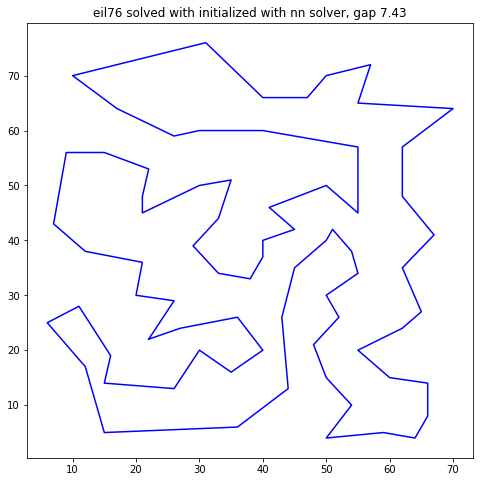

 7.43 % gap
with 23 number of uncrossed edges


In [5]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### 2.5opt
We will see it in the next Lecture